In [39]:
def load_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file.readlines():
            line_data = [float(x) for x in line.strip().split()]
            data.append(line_data)
    return data

training_data = load_data('./data/horseColicTraining.txt')
test_data = load_data('./data/horseColicTest.txt')

training_data[:5], test_data[:5]

([[2.0,
   1.0,
   38.5,
   66.0,
   28.0,
   3.0,
   3.0,
   0.0,
   2.0,
   5.0,
   4.0,
   4.0,
   0.0,
   0.0,
   0.0,
   3.0,
   5.0,
   45.0,
   8.4,
   0.0,
   0.0,
   0.0],
  [1.0,
   1.0,
   39.2,
   88.0,
   20.0,
   0.0,
   0.0,
   4.0,
   1.0,
   3.0,
   4.0,
   2.0,
   0.0,
   0.0,
   0.0,
   4.0,
   2.0,
   50.0,
   85.0,
   2.0,
   2.0,
   0.0],
  [2.0,
   1.0,
   38.3,
   40.0,
   24.0,
   1.0,
   1.0,
   3.0,
   1.0,
   3.0,
   3.0,
   1.0,
   0.0,
   0.0,
   0.0,
   1.0,
   1.0,
   33.0,
   6.7,
   0.0,
   0.0,
   1.0],
  [1.0,
   9.0,
   39.1,
   164.0,
   84.0,
   4.0,
   1.0,
   6.0,
   2.0,
   2.0,
   4.0,
   4.0,
   1.0,
   2.0,
   5.0,
   3.0,
   0.0,
   48.0,
   7.2,
   3.0,
   5.3,
   0.0],
  [2.0,
   1.0,
   37.3,
   104.0,
   35.0,
   0.0,
   0.0,
   6.0,
   2.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   74.0,
   7.4,
   0.0,
   0.0,
   0.0]],
 [[2.0,
   1.0,
   38.5,
   54.0,
   20.0,
   0.0,
   1.0,
   2.0,
   2.0,
   3.0,
   4.0,


In [40]:
import pandas as pd
import numpy as np

columns = [f'Feature_{i}' for i in range(1, len(training_data[0]))] + ['Target']
training_df = pd.DataFrame(training_data, columns=columns)
test_df = pd.DataFrame(test_data, columns=columns)

training_stats = training_df.describe()

In [41]:
missing_values_train = training_df.isnull().sum()
missing_values_test = test_df.isnull().sum()

training_stats, missing_values_train, missing_values_test

(        Feature_1  Feature_2   Feature_3   Feature_4   Feature_5   Feature_6  \
 count  299.000000  299.00000  299.000000  299.000000  299.000000  299.000000   
 mean     1.397993    1.64214   30.509365   66.220736   24.551839    1.906355   
 std      0.490305    2.17730   15.326224   33.741787   19.922496    1.315088   
 min      1.000000    1.00000    0.000000    0.000000    0.000000    0.000000   
 25%      1.000000    1.00000   37.200000   48.000000   12.000000    1.000000   
 50%      1.000000    1.00000   38.000000   60.000000   22.000000    2.000000   
 75%      2.000000    1.00000   38.500000   88.000000   34.500000    3.000000   
 max      2.000000    9.00000   40.800000  184.000000   96.000000    4.000000   
 
         Feature_7   Feature_8   Feature_9  Feature_10  ...  Feature_13  \
 count  299.000000  299.000000  299.000000  299.000000  ...  299.000000   
 mean     1.555184    2.404682    1.167224    2.404682  ...    1.143813   
 std      1.250288    1.817175    0.606560  

In [42]:
from sklearn.preprocessing import StandardScaler

# 初始化 StandardScaler 标准化处理器
scaler = StandardScaler()

# 在训练数据上拟合标准化处理器，并且转换训练数据和测试数据
X_train = scaler.fit_transform(training_df.drop('Target', axis=1))
X_test = scaler.transform(test_df.drop('Target', axis=1))

# 提取目标值（标签）
y_train = training_df['Target'].values
y_test = test_df['Target'].values

# 将 numpy 数组转换回带有标准化特征的 DataFrame
training_df_normalized = pd.DataFrame(X_train, columns=training_df.columns[:-1])
training_df_normalized['Target'] = y_train

test_df_normalized = pd.DataFrame(X_test, columns=test_df.columns[:-1])
test_df_normalized['Target'] = y_test

training_df_normalized.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Target
0,1.229880,-0.295420,0.522244,-0.006553,0.173369,0.833008,1.157524,-1.325526,1.375250,1.580701,...,-1.159795,-1.027135,-0.421713,0.715413,1.293194,0.188334,-0.491246,-0.795651,-0.559978,0.0
1,-0.813087,-0.295420,0.567994,0.646551,-0.228860,-1.452033,-1.245946,0.879383,-0.276155,0.362583,...,-1.159795,-1.027135,-0.421713,1.319674,-0.107766,0.484090,2.360483,0.947204,0.530793,0.0
2,1.229880,-0.295420,0.509173,-0.778403,-0.027746,-0.690352,-0.444789,0.328155,-0.276155,0.362583,...,-1.159795,-1.027135,-0.421713,-0.493109,-0.574753,-0.521480,-0.554535,-0.795651,-0.559978,1.0
3,-0.813087,3.385016,0.561458,2.902727,2.988974,1.594688,-0.444789,1.981837,1.375250,-0.246475,...,-0.145822,0.980142,2.105183,0.715413,-1.041740,0.365788,-0.535921,1.818631,2.330566,0.0
4,1.229880,-0.295420,0.443816,1.121535,0.525320,-1.452033,-1.245946,1.981837,1.375250,-1.464592,...,-1.159795,-1.027135,-0.421713,-1.097371,-1.041740,1.903718,-0.528475,-0.795651,-0.559978,0.0


In [43]:
def sigmoid(inX):
    # 定义 Sigmoid 函数，这是 Logistic 回归中常用的激活函数
    return 1.0 / (1 + np.exp(-inX))

def stocGradAscent(dataMatrix, classLabels, numIter=150):
    # 数据矩阵的行数和列数，即样本数和特征数
    m, n = np.shape(dataMatrix)
    # 初始化所有权重为1
    weights = np.ones(n)
    # 进行多次迭代来更新权重
    for j in range(numIter):
        # 创建一个索引列表，用于随机选择样本
        dataIndex = list(range(m))
        for i in range(m):
            # 计算学习率，随着迭代进行逐渐减少
            alpha = 4 / (1.0 + j + i) + 0.01
            # 随机选择一个样本的索引
            randIndex = int(np.random.uniform(0, len(dataIndex)))
            # 计算当前样本的预测值
            h = sigmoid(sum(dataMatrix[randIndex] * weights))
            # 计算预测值和实际值之间的误差
            error = classLabels[randIndex] - h
            # 更新权重
            weights = weights + alpha * error * dataMatrix[randIndex]
            # 删除已经使用的样本索引
            del(dataIndex[randIndex])
    return weights

# 将 DataFrame 转换为 numpy 数组，以便使用随机梯度上升函数
dataMatrix_train = training_df_normalized.iloc[:, :-1].values
classLabels_train = training_df_normalized.iloc[:, -1].values

# 使用随机梯度上升法训练 Logistic 回归模型
numIter = 1000  # 梯度上升的迭代次数
weights = stocGradAscent(dataMatrix_train, classLabels_train, numIter)

weights

array([ 0.40106584, -0.0696628 ,  0.91828586, -1.08120143,  0.60630137,
       -0.26165873,  0.09604688, -0.13729635, -0.21691419, -0.32309545,
        0.92325826, -0.80392025,  0.63380269,  0.62229812, -0.77173082,
        0.10436008, -0.00845365,  0.03613412,  0.18002274, -0.33428636,
       -0.04167598])

In [44]:
def classifyVector(inX, weights):
    # 计算给定输入和权重的 Logistic 回归模型的概率预测值
    prob = sigmoid(sum(inX * weights))
    # 如果预测概率大于 0.5，返回类别 1，否则返回类别 0
    return 1.0 if prob > 0.5 else 0.0

def calculate_accuracy(dataMatrix, classLabels, weights):
    # 数据集的样本数
    numSamples = len(classLabels)
    # 错误计数初始化
    errorCount = 0
    # 对于数据集中的每一个样本
    for i in range(numSamples):
        # 如果分类结果与真实标签不一致，则错误计数增加
        if int(classifyVector(dataMatrix[i], weights)) != int(classLabels[i]):
            errorCount += 1
    # 计算并返回准确率
    accuracy = (1 - float(errorCount)/numSamples) * 100
    return accuracy

# 在训练集上计算准确率
accuracy_train = calculate_accuracy(dataMatrix_train, classLabels_train, weights)

# 在测试集上计算准确率
dataMatrix_test = test_df_normalized.iloc[:, :-1].values
classLabels_test = test_df_normalized.iloc[:, -1].values
accuracy_test = calculate_accuracy(dataMatrix_test, classLabels_test, weights)

accuracy_train, accuracy_test

(68.22742474916387, 68.65671641791045)

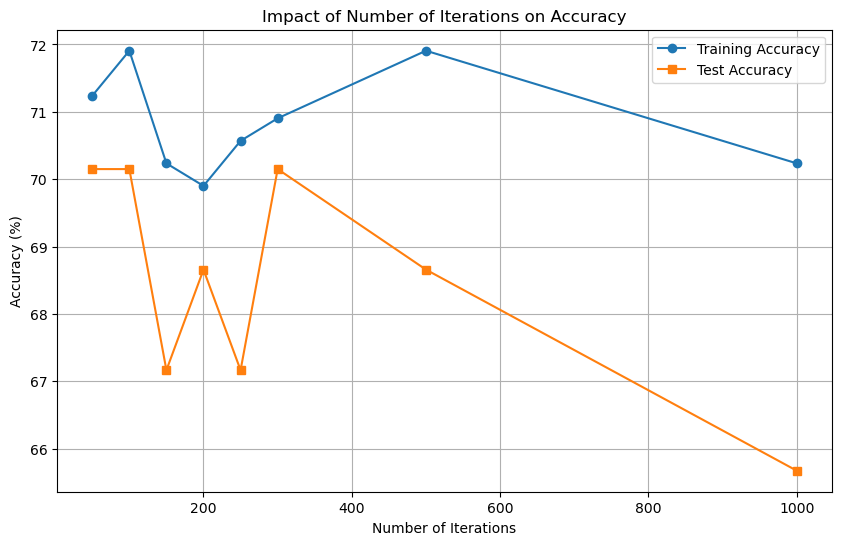

In [45]:
import matplotlib.pyplot as plt

def stocGradAscent0(dataMatrix, classLabels, numIter=150):
    m, n = np.shape(dataMatrix)
    weights = np.ones(n)
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4 / (1.0 + j + i) + 0.01
            randIndex = int(np.random.uniform(0, len(dataIndex)))
            h = sigmoid(np.sum(dataMatrix[randIndex] * weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

# 现在重新进行迭代次数对性能影响的分析
iterations = [50, 100, 150, 200, 250, 300, 500, 1000]
train_accuracies = []
test_accuracies = []

for iter in iterations:
    weights = stocGradAscent0(dataMatrix_train, classLabels_train, numIter=iter)
    train_accuracy = calculate_accuracy(dataMatrix_train, classLabels_train, weights)
    test_accuracy = calculate_accuracy(dataMatrix_test, classLabels_test, weights)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# 绘制迭代次数与准确率的关系图
plt.figure(figsize=(10, 6))
plt.plot(iterations, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(iterations, test_accuracies, marker='s', label='Test Accuracy')
plt.title('Impact of Number of Iterations on Accuracy')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 选择脉搏和白细胞计数作为特征
X_train_logistic = X_train[:, [3, 17]]  # Feature indices are based on the original dataframe
X_test_logistic = X_test[:, [3, 17]]

# 初始化逻辑回归模型
logistic_model = LogisticRegression()

# 训练逻辑回归模型
logistic_model.fit(X_train_logistic, y_train)

# 在测试集上预测
y_pred_logistic = logistic_model.predict(X_test_logistic)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_logistic

0.7761194029850746

In [47]:
from sklearn.ensemble import RandomForestClassifier

# 选择可能重要的特征的索引，根据之前的特征描述
important_features_indices = [2, 3, 4, 7, 11, 10, 16, 17]

# 选择特征
X_train_important = X_train[:, important_features_indices]
X_test_important = X_test[:, important_features_indices]

# 初始化随机森林模型
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练模型
rf.fit(X_train_important, y_train)

# 获取特征重要性
feature_importances = rf.feature_importances_

# 特征重要性的可视化
important_features = training_df.columns[important_features_indices]
importance_df = pd.DataFrame({'Feature': important_features, 'Importance': feature_importances})

# 对特征重要性进行排序
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

importance_df

,Feature,Importance
1,Feature_4,0.206027
7,Feature_18,0.197786
0,Feature_3,0.141721
3,Feature_8,0.122271
2,Feature_5,0.111364
4,Feature_12,0.088378
5,Feature_11,0.070822
6,Feature_17,0.061631


In [48]:
# 在测试集上进行预测
y_pred = rf.predict(X_test_important)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7611940298507462